<a href="https://colab.research.google.com/github/December04/MachineLearningProgramming/blob/main/Week05/Assignment02-DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [12]:
digits = datasets.load_digits()
X = digits.images.astype('float32') / 16.0  # 0~16 -> 0~1
y = to_categorical(digits.target, 10)

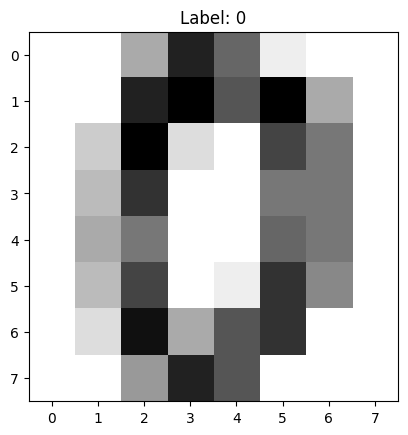

In [4]:
plt.imshow(X[0], cmap=plt.cm.gray_r)
plt.title(f"Label: {digits.target[0]}")
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train_fc = X_train.reshape(-1, 8*8)
X_test_fc = X_test.reshape(-1, 8*8)

In [15]:
fc_model = Sequential([
    Input(shape=(64,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

In [18]:
fc_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

fc_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,570 (25.66 KB)

 Trainable params: 6,570 (25.66 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = fc_model.fit(X_train_fc, y_train,
                       epochs=20,
                       batch_size=32,
                       validation_split=0.2)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1679 - loss: 2.2672 - val_accuracy: 0.4479 - val_loss: 1.9103
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6159 - loss: 1.7172 - val_accuracy: 0.7951 - val_loss: 1.3242
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8450 - loss: 1.1153 - val_accuracy: 0.8507 - val_loss: 0.8217
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8890 - loss: 0.6932 - val_accuracy: 0.8819 - val_loss: 0.5571
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9269 - loss: 0.4457 - val_accuracy: 0.9028 - val_loss: 0.4358
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9358 - loss: 0.3362 - val_accuracy: 0.9132 - val_loss: 0.3577
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9515 - loss: 0.2705 - val_accuracy: 0.9201 - val_loss: 0.3157
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9593 - loss: 0.2199 - val_accuracy: 0.9167 - val_loss

In [20]:
loss, acc = fc_model.evaluate(X_test_fc, y_test)
print(f"테스트 정확도: {acc:.4f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9776 - loss: 0.1053  
테스트 정확도: 0.9611
